In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score,recall_score,precision_score,plot_roc_curve, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.utils import class_weight
import shap
import matplotlib.pyplot as plt
shap.initjs()
from scipy.interpolate import interp1d


In [2]:
########################################
training = pd.read_csv('input_exon_training_all_mutation_analysis_2022.txt', sep = '\t',  index_col=False)
########################################
X_training = training[['CADD_splice','spliceAI','MMsplicing_abs','Trap','dbscSNV_ADA_SCORE','dbscSNV_RF_SCORE','SPIDEX_dpsi_abs','SPIDEX_zscore_abs','maxscant_diff_abs']]
X_training.columns = ['CADD-splice','SpliceAI','MMsplice','TraP','dbscSNV-ADA','dbscSNV-RF','SPIDEX-dpsi','SPIDEX-zscore','MaxEntscan']
y_training = training['group']
########################################
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.25, random_state = 666, stratify=y_training)
train_classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y_train)
########################################
machine_model = xgb.XGBClassifier(objective= 'binary:logistic', learning_rate =0.4, n_estimators=700, max_depth=3,
                                      eval_metric='logloss',subsample=0.7, colsample_bytree=0.7, gamma=2, min_child_weight=1,
                                      random_state=666, use_label_encoder=False,nthread=15,n_jobs=1)
machine_model.fit(X_train, y_train, sample_weight=train_classes_weights)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=2, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=700, n_jobs=1, nthread=15,
              num_parallel_tree=1, random_state=666, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


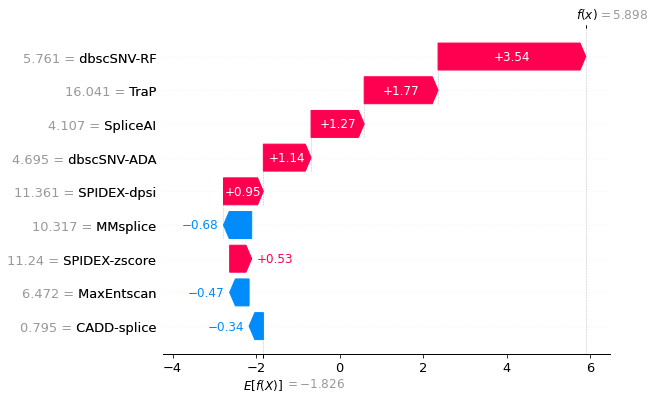

In [3]:
explainer = shap.TreeExplainer(machine_model)
shap_values = explainer(X_training)
shap_values
shap.plots.waterfall(shap_values[1])


In [4]:
AAAAA = shap_values[1].base_values + sum(shap_values[1].values)
AAAAA

5.897771120071411

In [5]:
bbbbbb = shap_values[1].data * shap_values[1].values
bbbbbb

array([-0.27217648,  5.22659278, -6.97323584, 28.38355662,  5.3662029 ,
       20.38673806, 10.84974801,  5.93275977, -3.01107793])

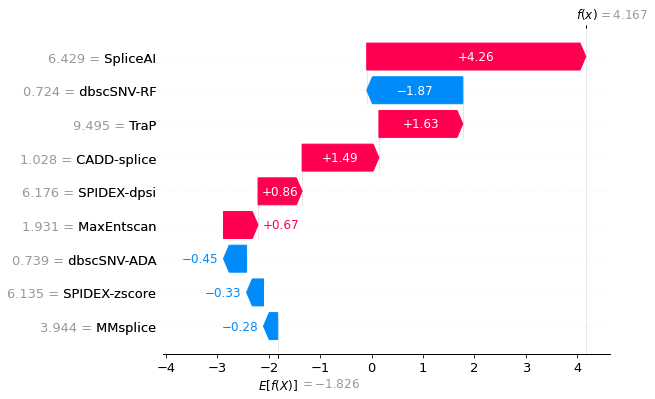

In [6]:

shap.plots.waterfall(shap_values[5])



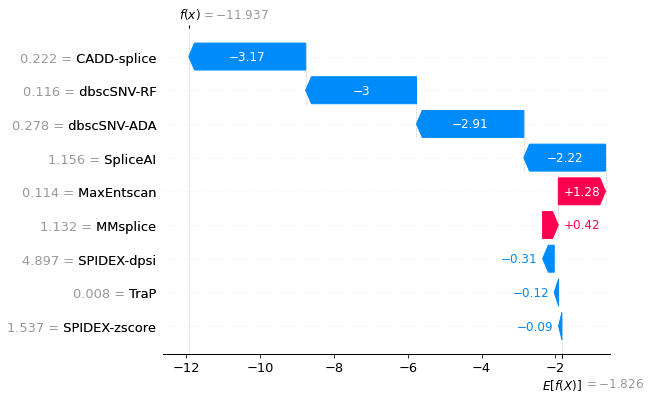

In [7]:
shap.plots.waterfall(shap_values[5786])

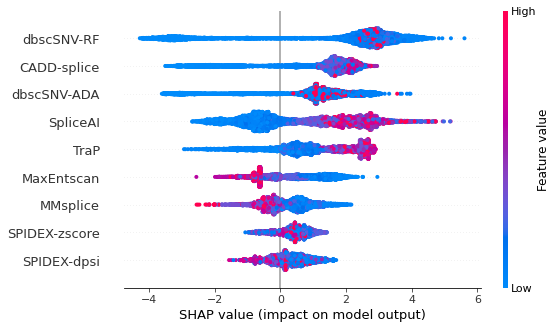

In [8]:
shap.summary_plot(shap_values, X_training)

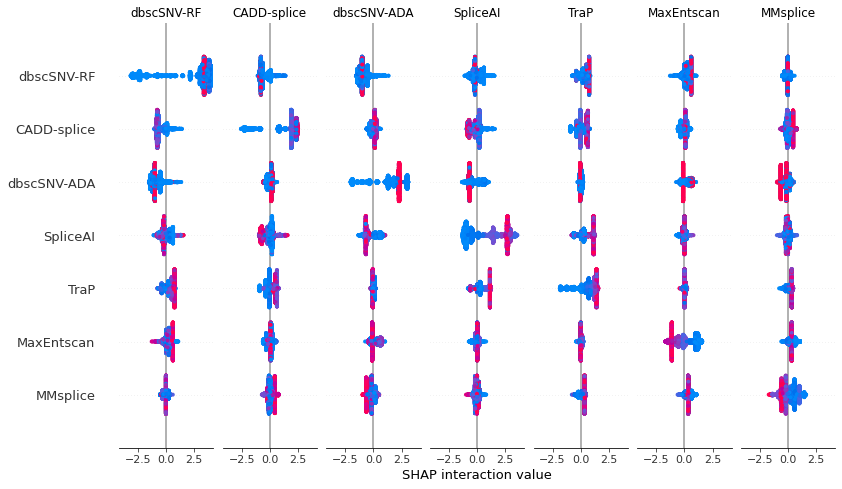

In [9]:
shap_interaction_values = explainer.shap_interaction_values(X_training)
shap.summary_plot(shap_interaction_values, X_training)

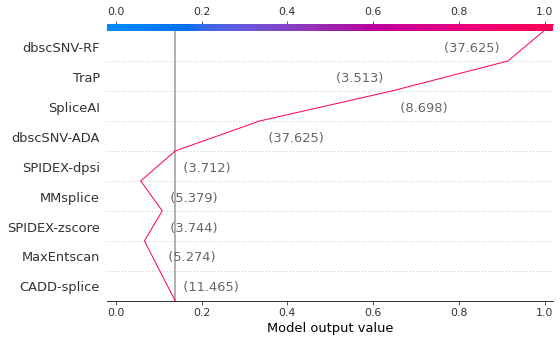

In [18]:
select = range(9)
expected_value = explainer.expected_value
feasure = X_training.iloc[select]
feasure_display = X_training.loc[feasure.index]
shap_values = explainer.shap_values(feasure)[1]
shap.decision_plot(expected_value, shap_values, feasure_display, link='logit')
# shap.decision_plot(expected_value, shap_values, feasure_display, link='logit')